In [39]:
import cv2
import os
from keras.utils import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL  import Image
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,GlobalMaxPool2D
from keras.models import Sequential

In [40]:
Base_dir=r"D:\sohrab\AI\AI_Code\UTKFace"

In [41]:
images=os.listdir(Base_dir)

In [42]:
images_paths = []
age_labels = []
gender_labels = []
race_labels = []

for filename in images:
    image_path = os.path.join(Base_dir, filename)
    temp = filename.split('_')
    if str(temp[2]).isnumeric() and str(temp[0]).isnumeric():
        age = int(temp[0])
        gender = int(temp[1])
        race=int(temp[2])
        images_paths.append(image_path)
        race_labels.append(race)
        age_labels.append(age)
        gender_labels.append(gender)    

In [43]:
temp

['9', '1', '4', '20170103213057382.jpg.chip.jpg']

In [44]:
len(age_labels),len(gender_labels)

(23705, 23705)

In [45]:
def standard_saz(images):    
    features=[]
    for image in images:
        img=load_img(image,grayscale=True)
        img=img.resize((128,128), Image.LANCZOS)
        img=np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    
    
    return features
        

In [46]:
def rescale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.resize(img, (128,128))              
    img = img.reshape(128,128,1) / 255.0          
    return img


In [47]:
x=standard_saz(images_paths)
x=x/255

C:\Users\EMTOO\AppData\Roaming\Python\Python38\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [48]:
x.shape


(23705, 128, 128, 1)

In [49]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(GlobalMaxPool2D())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(126,activation="relu"))
model.add(Dense(1))
print(model.summary())
model.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

In [50]:
# x=Conv2D(filters=32,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=64,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Conv2D(filters=128,kernel_size=(3,3),input_shape=(128,128,1),activation="relu")(x)
# x=MaxPool2D(pool_size=(2,2))(x)

# x=Dense(256,activation="relu")(x)
# x=Dropout(0.3)(x)
# x=Dense(126,activation="relu")(x)

# age_output=Dense(1,name='age_output')(x)
# gender_output=Dense(1,activation='sigmoid',name='gender_output')(x)
# # race_output=Dense(1,activation='sigmoid',name='race_output')(x)

# model.compile(
#     optimizer="adam",
#     loss={"age_output":"mse", "gender_output":"binary_crossentropy"},
#     metrics={"age_output":"mae", "gender_output":"accuracy"}
# )

In [51]:
y_age=np.array(age_labels)

In [52]:
X_train, X_test, y_train, y_test=train_test_split(x,y_age,shuffle=True,random_state=42)


In [53]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
556/556 [==============================] - 77s 133ms/step - loss: 449.3644 - accuracy: 0.0479 - val_loss: 440.4820 - val_accuracy: 0.0450
Epoch 2/10
556/556 [==============================] - 75s 135ms/step - loss: 404.6717 - accuracy: 0.0481 - val_loss: 378.9213 - val_accuracy: 0.0450
Epoch 3/10
556/556 [==============================] - 79s 141ms/step - loss: 345.8344 - accuracy: 0.0481 - val_loss: 333.8866 - val_accuracy: 0.0450
Epoch 4/10
556/556 [==============================] - 78s 141ms/step - loss: 304.0026 - accuracy: 0.0471 - val_loss: 276.4227 - val_accuracy: 0.0442
Epoch 5/10
556/556 [==============================] - 80s 144ms/step - loss: 265.4514 - accuracy: 0.0447 - val_loss: 262.6592 - val_accuracy: 0.0366
Epoch 6/10
556/556 [==============================] - 79s 142ms/step - loss: 244.6557 - accuracy: 0.0411 - val_loss: 229.0211 - val_accuracy: 0.0385
Epoch 7/10
556/556 [==============================] - 81s 145ms/step - loss: 221.4853 - accuracy: 0.0425 -

In [54]:
out=model.predict(X_test)

186/186 [==============================] - 7s 35ms/step


In [55]:
out.shape

(5927, 1)

In [56]:
out2 = model.predict(np.expand_dims(rescale(image), axis=0))
out2


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


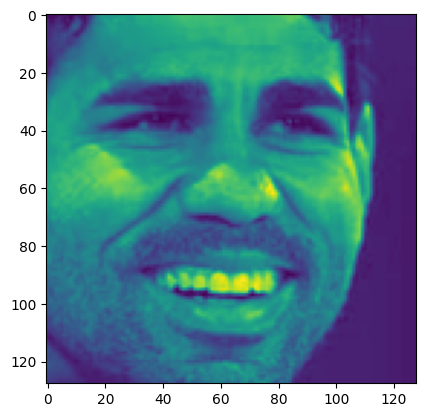

In [ ]:
plt.imshow(X_test[3])

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Cannot access the webcam")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Cannot read a frame from the webcam")
        break
    img_rescale=rescale(frame)
    
    cv2.imshow("Segmentation",frame)
    # print(results)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))